In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
df = pd.read_excel("data/IPH_robos_ene-ago-2025_tecmty.xlsx")
print("Shape of the data= ", df.shape)
df.head()

Shape of the data=  (1099, 10)


,FOLIO,FECHA,HORA,MINUTO,TIPO,VOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE
0,759476,2025-01-01,5,11,ROBO A NEGOCIO,SI,28.600113,-106.061258,Zapata,76
1,759978,2025-01-01,5,25,ROBO A NEGOCIO,SI,28.609652,-106.065990,Zapata,75
2,760050,2025-01-01,6,31,ROBO DE VEHICULO,NO,28.639322,-106.039862,Morelos,51
3,760404,2025-01-01,11,50,ROBO A CASA HABITACION,NO,28.643275,-106.030795,Morelos,51
4,769412,2025-01-01,12,0,ROBO A NEGOCIO,NO,28.693501,-106.115590,Villa,17


Text(0.5, 1.0, 'UBICACIÓN DE LOS ROBOS EN CHIHUAHUA')

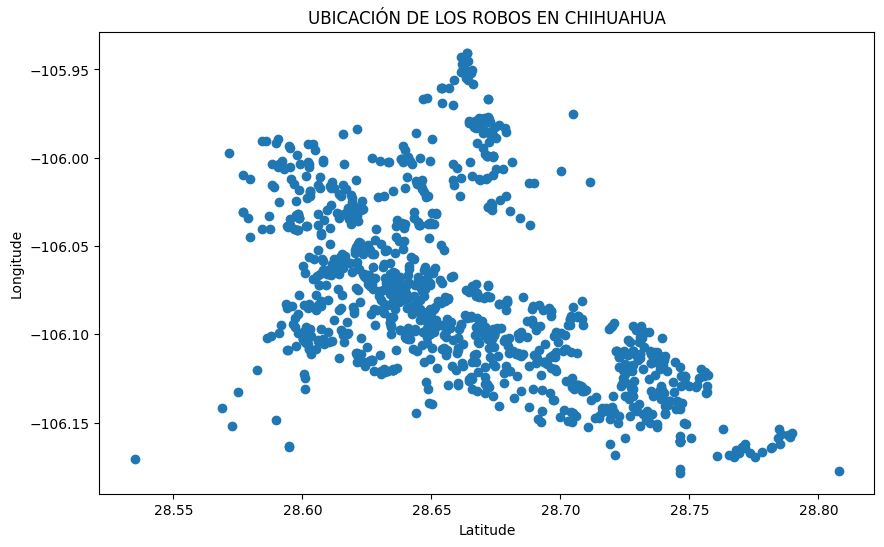

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df['LATITUD'],df['LONGITUD'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('UBICACIÓN DE LOS ROBOS EN CHIHUAHUA')

In [6]:
X = df.iloc[:, [3,4]].values
X[:5] # Show first 5 records only
X = df[['LATITUD', 'LONGITUD']]


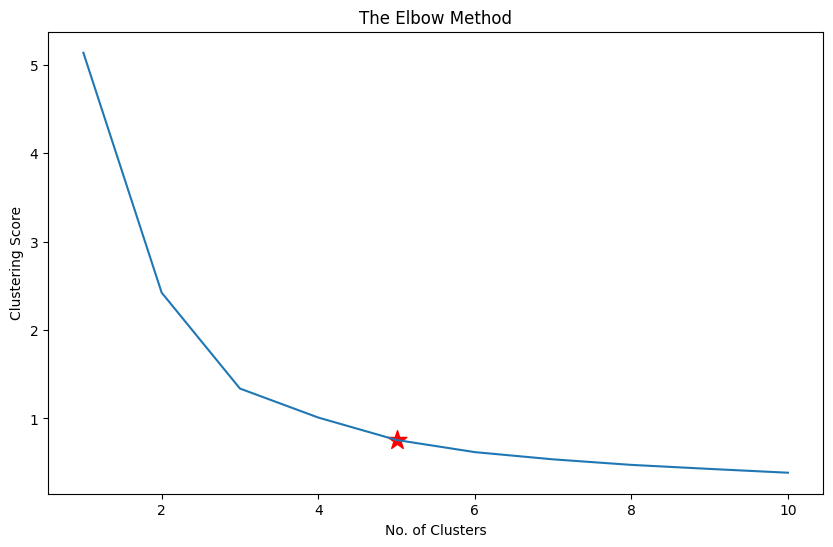

In [7]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [8]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([2, 0, 2, ..., 3, 0, 3], shape=(1099,), dtype=int32)

In [9]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df

Number of data points in each cluster= 
 Cluster
0    335
2    217
1    213
4    211
3    123
Name: count, dtype: int64


,FOLIO,FECHA,HORA,MINUTO,TIPO,VOLENCIA,LATITUD,LONGITUD,DISTRITO,CUADRANTE,Cluster
0,759476,2025-01-01,5,11,ROBO A NEGOCIO,SI,28.600113,-106.061258,Zapata,76,2
1,759978,2025-01-01,5,25,ROBO A NEGOCIO,SI,28.609652,-106.065990,Zapata,75,0
2,760050,2025-01-01,6,31,ROBO DE VEHICULO,NO,28.639322,-106.039862,Morelos,51,2
3,760404,2025-01-01,11,50,ROBO A CASA HABITACION,NO,28.643275,-106.030795,Morelos,51,2
4,769412,2025-01-01,12,0,ROBO A NEGOCIO,NO,28.693501,-106.115590,Villa,17,4
...,...,...,...,...,...,...,...,...,...,...,...
1094,1345602,2025-08-30,18,40,ROBO A NEGOCIO,SI,28.615299,-106.097890,Zapata,68,0
1095,1345968,2025-08-30,21,0,ROBO A NEGOCIO,NO,28.623672,-106.115850,Diana,32,0
1096,1346807,2025-08-31,1,58,ROBO DE VEHICULO,NO,28.649612,-106.001734,Morelos,52,3
1097,1347625,2025-08-31,10,1,ROBO DE VEHICULO,NO,28.607209,-106.083870,Zapata,74,0


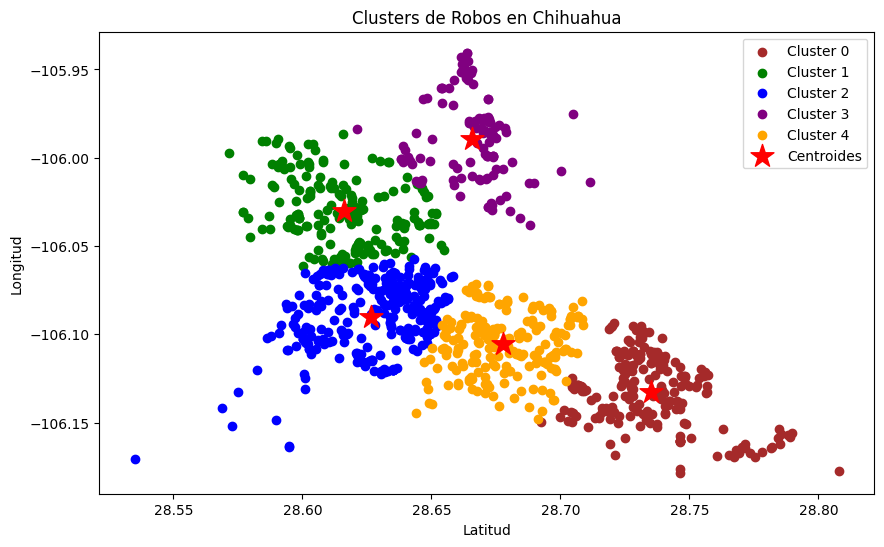

In [10]:
# Usamos solo lat/lon como matriz NumPy
X = df[['LATITUD','LONGITUD']].values  

# Entrenamos k-means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
pred = kmeans.fit_predict(X)

# Gráfico
plt.figure(figsize=(10,6))

plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c='brown', label='Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c='green', label='Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c='blue', label='Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c='purple', label='Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c='orange', label='Cluster 4')

# centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroides', marker='*')

plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.legend()
plt.title('Clusters de Robos en Chihuahua')
plt.show()


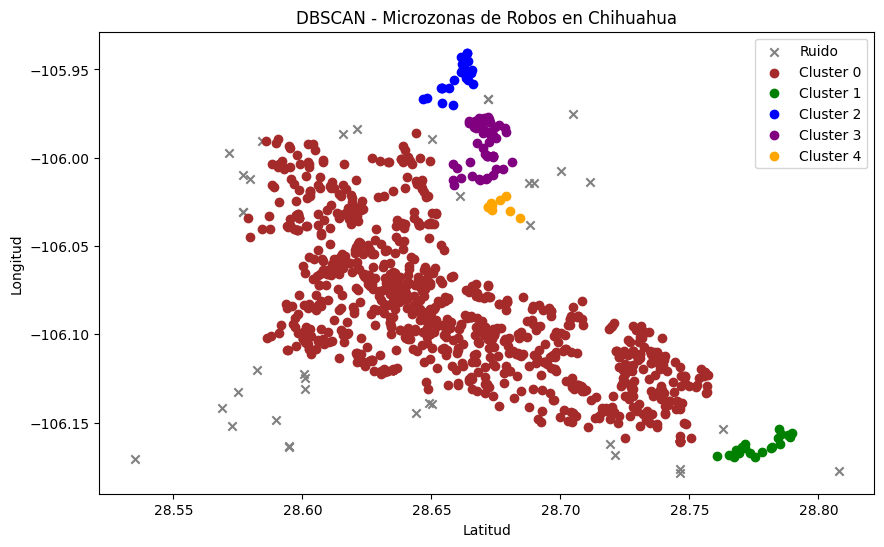

=== REPORTE DBSCAN ===
Número de clusters encontrados: 5
Número de puntos de ruido: 38
Distribución de puntos por cluster:
Ruido: 38 puntos
Cluster 0: 947 puntos
Cluster 1: 20 puntos
Cluster 2: 26 puntos
Cluster 3: 57 puntos
Cluster 4: 11 puntos


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Tomamos solo lat/lon como matriz
X = df[['LATITUD', 'LONGITUD']].values

# Entrenamos DBSCAN
# eps = radio máximo para que dos puntos sean vecinos
# min_samples = puntos mínimos para formar un cluster denso
dbscan = DBSCAN(eps=0.01, min_samples=8)  
pred = dbscan.fit_predict(X)

# Graficamos resultados
plt.figure(figsize=(10,6))

# Puntos de ruido (-1)
plt.scatter(X[pred == -1, 0], X[pred == -1, 1],
            c='gray', marker='x', label='Ruido')

# Clusters encontrados
n_clusters = len(set(pred)) - (1 if -1 in pred else 0)
colors = ['brown','green','blue','purple','orange','cyan','pink']

for cluster_id in range(n_clusters):
    plt.scatter(X[pred == cluster_id, 0], X[pred == cluster_id, 1],
                c=colors[cluster_id % len(colors)],
                label=f'Cluster {cluster_id}')

plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.legend()
plt.title('DBSCAN - Microzonas de Robos en Chihuahua')
plt.show()

# ----------------------
# REPORTE
# ----------------------
print("=== REPORTE DBSCAN ===")
print(f"Número de clusters encontrados: {n_clusters}")
print(f"Número de puntos de ruido: {(pred == -1).sum()}")
print("Distribución de puntos por cluster:")
unique, counts = np.unique(pred, return_counts=True)
for u, c in zip(unique, counts):
    if u == -1:
        print(f"Ruido: {c} puntos")
    else:
        print(f"Cluster {u}: {c} puntos")

